# **PROJECT: IRIS  USING FNN DEEP LEARNING ALGORITHM**

 **Classification with fully connected neural network with the IRIS dataset**

**IMPORT LIBRARIES**

In [1]:
import numpy as np
from tensorflow import keras # Datasetas

2022-03-16 18:11:48.019672: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-16 18:11:48.019709: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## **ABOUT DATASET**

The structural data set of the findings includes 4 characteristics for the length and width of the sepals and petals, based on which the type of flower is distinguished from 3 different classes.


 https://archive.ics.uci.edu/ml/datasets/iris 


 **Attribute Information:**

 * sepal length in cm
 * sepal width in cm
 * petal length in cm
 * petal width in cm



 **Class:**

* Iris Setosa
* Iris Versicolour
* Iris Virginica



**LOAD DATASET** 

In [2]:
from sklearn.datasets import load_iris

iris_data = load_iris() # load the iris dataset

x = iris_data.data # Features
y = iris_data.target # Classes

print("Sample of Features:")
print(x[:5])

print("\n")

print("Sample of Classes:")
print(y[:5])

Sample of Features:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Sample of Classes:
[0 0 0 0 0]


### **PREPROCESSING**

In [3]:
# Convert data to a single column
y = y.reshape(-1, 1) 

print("Sample of Classes in a single column:")
y[:5]

Sample of Classes in a single column:


array([[0],
       [0],
       [0],
       [0],
       [0]])

In [4]:
# Store Number of classes befor convert to one-hot
print('Classes are:')
print(np.unique(y)) # Classes
number_of_classes = len(np.unique(y)) # 3
number_of_classes

Classes are:
[0 1 2]


3

In [5]:
# Convert classes in one-hot

y = keras.utils.to_categorical(y , num_classes=3)
y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### **SPLIT THE DATA** 

In [6]:
from sklearn.model_selection import train_test_split

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)
train_x[:5]

array([[5.8, 2.8, 5.1, 2.4],
       [4.7, 3.2, 1.3, 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [5.6, 3. , 4.1, 1.3],
       [6.9, 3.1, 4.9, 1.5]])

**INITIAL NEURAL NEETWORK** 

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Store input dimention
size_sample , dimantion = x.shape

model = Sequential()
model.add(Dense(10 , activation='relu' , input_dim=dimantion)) # 1st Layerst
model.add(Dense(10 , activation='relu' )) # 2nd Layer
model.add(Dropout(0.5)) # Droupout ( kill 50% of neurals)
model.add(Dense(number_of_classes, activation='softmax')) # Final Layer

2022-03-16 18:11:52.887823: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-16 18:11:52.887905: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-16 18:11:52.887937: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mahdi-X550IK): /proc/driver/nvidia/version does not exist
2022-03-16 18:11:52.888329: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# Summary of created Neural Network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


**OPTIMISING**


In [9]:
from tensorflow.keras.optimizers import Adam

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.9/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**LEARNING**

In [10]:
history = model.fit(train_x,train_y,epochs=200,batch_size=5,validation_split=0.2)

Epoch 1/200
20/20 [==============================] - 1s 25ms/step - loss: 0.9902 - accuracy: 0.3854 - val_loss: 0.8868 - val_accuracy: 0.4167
Epoch 2/200
20/20 [==============================] - 0s 8ms/step - loss: 0.9800 - accuracy: 0.3333 - val_loss: 0.8696 - val_accuracy: 0.5833
Epoch 3/200
20/20 [==============================] - 0s 8ms/step - loss: 0.9244 - accuracy: 0.4896 - val_loss: 0.8484 - val_accuracy: 0.5833
Epoch 4/200
20/20 [==============================] - 0s 8ms/step - loss: 0.9071 - accuracy: 0.4896 - val_loss: 0.8179 - val_accuracy: 0.5833
Epoch 5/200
20/20 [==============================] - 0s 8ms/step - loss: 0.8724 - accuracy: 0.5625 - val_loss: 0.7857 - val_accuracy: 0.5833
Epoch 6/200
20/20 [==============================] - 0s 8ms/step - loss: 0.7986 - accuracy: 0.5000 - val_loss: 0.7474 - val_accuracy: 0.6250
Epoch 7/200
20/20 [==============================] - 0s 9ms/step - loss: 0.7660 - accuracy: 0.6562 - val_loss: 0.6976 - val_accuracy: 0.7500
Epoch 8/200


### **EVALUATION**

In [11]:
# Test on unseen data
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 56ms/step - loss: 0.1569 - accuracy: 1.0000
Final test set loss: 0.156932
Final test set accuracy: 1.000000


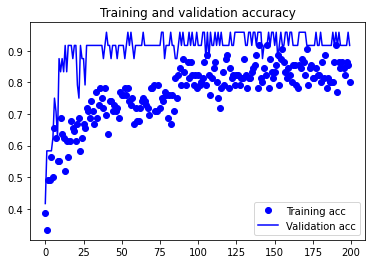

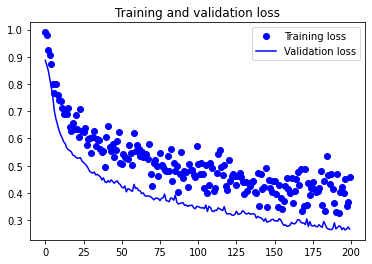

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()